# <center> Tarea Semanal 3 <center>
## <center> Autor: Arturo Huber <center>

## Introducción Teórica

En esta tarea semanal trabajaremos sobre el fenómeno del desparramo espectral de potencia, el cual puede observarse al analizar la densidad espectral de potencia de señales de ciertas frecuencias.

La densidad espectral de potencia (PSD) describe cómo se distribuye la potencia de una señal en el dominio de la frecuencia. Como este análisis se realiza en dicho dominio, la PSD se calcula a partir de la transformada de Fourier de la señal.

Al trabajar con señales discretas y aplicar la Transformada Discreta de Fourier (DFT), se deben considerar algunas limitaciones. Como por ejemplo, la resolución en frecuencia.

$$
\Delta f = f_s / N
$$

Siendo:

$\Delta f $: La minima unidad de frecuencia<br>
$f_s$ : La frecuencia de muestreo<br>
$N$ : El numero de muestras<br>

Dado que $\Delta f$ es finito, no todas las frecuencias reales de la señal se representan exactamente en el eje de frecuencias. Cuando una señal presenta potencia en una frecuencia que no coincide exactamente con los múltiplos de $\Delta f$, su energía no se puede representar en dicho punto espectral, sino que se *desparrama* sobre frecuencias vecinas. Este fenómeno recibe el nombre de *desparramo espectral*.

En la práctica se trabaja con señaesl de duración finita. Matematicamente, esto se puede pensar como multiplicar la señal infinita por una ventana rectangular en el tiempo. En el dominio de la frecuencia, dicha multiplicación se traduce en una convolución entra la señal en cuestión y con el espectro de la ventana, si la ventana es rectangular, este espectro será una sinc . Como consecuencia, la energía de una componente senoidal idealmente concentrada en una sola frecuencia se reparte en un lóbulo principal acompañado de lóbulos laterales que afectan frecuencias adyacentes.

Una técnica para visualzar mejor el espectro en frecuencia es el uso de *zero padding*, que consiste en agregar ceros al final de la señal antes de calcular la DFT. El zero padding no elimina el desparramo espectral, ya que no cambia el contenido en frecuencia de la señal. Sin embargo, permite interpolar el espectro y disminuir el paso en frecuencia, como vimos anteriormente, $\Delta f$ depende inversamente del numero de muestras, entónces al agregar ceros al final de la señal, aumenta el número de muestras, al disminur $\Delta f$, mejora la resolución en frecuencia. Esto genera un espectro más suave y detallado, lo que facilita la visualización de los lóbulos y ayuda a identificar con mayor precisión la frecuencia de los picos, aunque no mejora la resolución espectral real de la señal.

Cabe destacar que, de acuerdo con la identidad de Parseval, la energía total de la señal es la misma en el dominio temporal que en el dominio frecuencial. Esto implica que el fenómeno de desparramo espectral no altera la energía global de la señal, sino que únicamente redistribuye la potencia que debería concentrarse en una frecuencia puntual hacia bins vecinos del espectro. En este sentido, Parseval asegura que la PSD sigue representando fielmente la potencia de la señal, aunque su visualización se vea afectada por la resolución en frecuencia y el uso de ventanas temporales finitas.

Identidad de Parseval, la energia total es la misma tanto en el dominio de la frecuncia como en el tiempo
$$
\sum_{n=0}^{N-1} |x[n]|^2 = \frac{1}{N} \sum_{k=0}^{N-1} |X[k]|^2
$$

En resumen, la densidad espectral de potencia permite analizar cómo se distribuye la energía de una señal en el dominio de la frecuencia, aunque al trabajar con un número finito de muestras aparecen limitaciones en la resolución frecuencial que genera el fenómeno de desparramo espectral, donde la potencia de una frecuencia se reparte en bins vecinos. Sin embargo, la identidad de Parseval garantiza que la energía total de la señal permanece inalterada: no se pierde ni se crea potencia, sino que esta simplemente se redistribuye en el espectro. De este modo, el *leakage* no representa un error en la energía de la señal, sino un efecto de representación ligado al uso de ventanas finitas y a la discretización de la transformada de Fourier.

## Análisis y Desarrollo

Para el desarrollo de esta tarea, graficamos las Densidades espectrales de potencia de las siguientes señales.

Señal senoidal de potencia unitaria con las siguientes frecuencias:

$$
f_0 = k_0 \cdot \frac{f_s}{N}
$$

Siendo $k_0$:

* $k_0 = \frac{N}{4}$
* $k_0 = \frac{N}{4} + 0.25$
* $k_0 = \frac{N}{4} + 0.5$


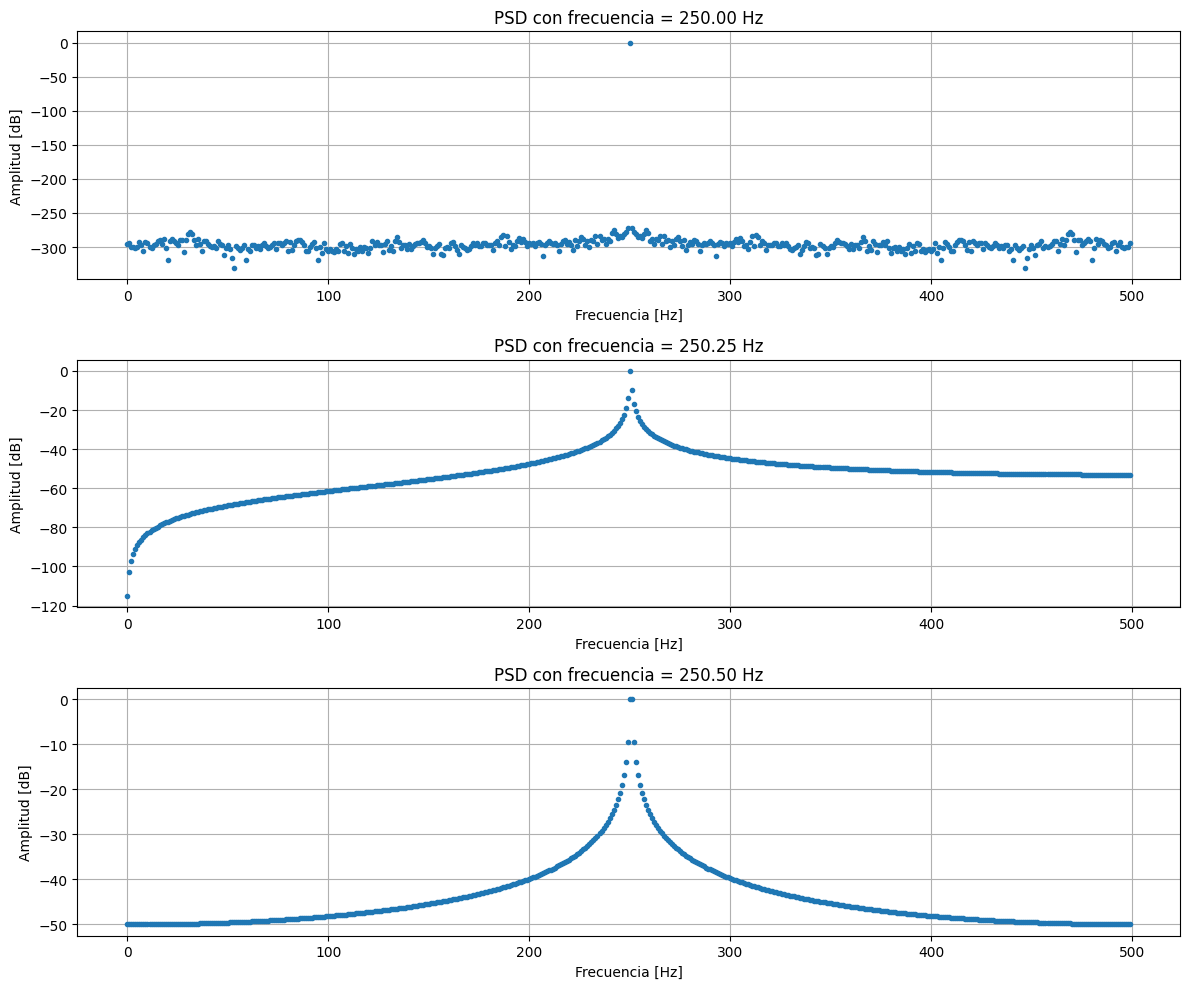

la resolucion de la frecuencia es: 1.0Hz


In [11]:
import numpy as np
import matplotlib.pyplot as plt


# =========== (a) PSD de senoidales =============
# Parámetros
N = 1000                                         # Numero de muestras
fs = 1000                                        # Frecuencia de muestreo
df = fs / N                                      # delta f
amp = np.sqrt(2)                                 # Potencia unitaria
t = np.arange(N) / fs                            # Vector de tiempo

# Valores de k0
k0_values = [N/4, N/4 + 0.25, N/4 + 0.5]

plt.figure(figsize=(12, 10))

for i, k0 in enumerate(k0_values):
    
    f0 = k0 * df                                   # frecuencia en Hz
    x = amp* np.sin(2 * np.pi * f0 * t)            # señal
    
    
    # FFT y PSD
    X = np.fft.fft(x, N)                           # FFT
    psd = (np.abs(X)**2) /( N)                     # densidad espectral
    psd_dB = 10 * np.log10(psd / np.max(psd))
    
    # Eje de frecuencias
    freqs = np.fft.fftfreq(N, 1/fs)
    # Grafico
    plt.subplot(3, 1, i+1)
    plt.plot(freqs[:N//2], psd_dB[:N//2],'.')
    plt.title(f"PSD con frecuencia = {f0:.2f} Hz")
    plt.xlabel("Frecuencia [Hz]")
    plt.ylabel("Amplitud [dB]")
    plt.grid()

plt.tight_layout()
plt.show()

print(f"la resolucion de la frecuencia es: {df}Hz")


Según la teoría de la Transformada de Fourier, el espectro de una señal senoidal ideal corresponde a una delta en frecuencia, lo cual se observa en el primer gráfico. Sin embargo, en los dos gráficos siguientes esto no ocurre, ya que la frecuencia de la señal no es un múltiplo exacto de la resolución espectral $\Delta f = 1 Hz $. En consecuencia, dichas frecuencias no pueden representarse de manera puntual en la grilla de la DFT.

Este desajuste da lugar al fenómeno de desparramo espectral, que se manifiesta gráficamente como una dispersión de energía en torno a la frecuencia principal. Es precisamente este efecto el que se aprecia en los últimos dos gráficos.

In [2]:
# ====== (b) Verificación de Parseval ======
for k0 in k0_values:
    f0 = k0 * df
    x = amp * np.sin(2 * np.pi * f0 * t) 

    X = np.fft.fft(x, N)
    
    pot_tiempo = np.sum(np.abs(x)**2)/N
    pot_freq = np.sum(np.abs(X)**2) / N**2
    
    print(f"f = {f0:.2f} : Potencia temporal = {pot_tiempo:.2f}\t Potencia espectral = {pot_freq:.2f}")



f = 250.00 : Potencia temporal = 1.00	 Potencia espectral = 1.00
f = 250.25 : Potencia temporal = 1.00	 Potencia espectral = 1.00
f = 250.50 : Potencia temporal = 1.00	 Potencia espectral = 1.00


Mediante la identiad de parseval, verificamos que, aunque los graficos se vean diferentes por el desparramo espectral, la potencia sigue siendo unitaria.

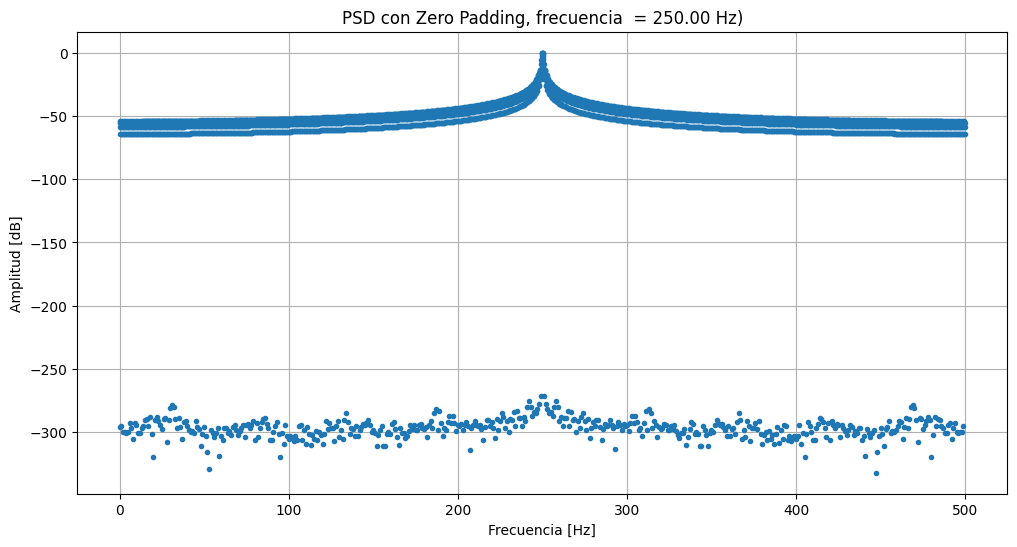

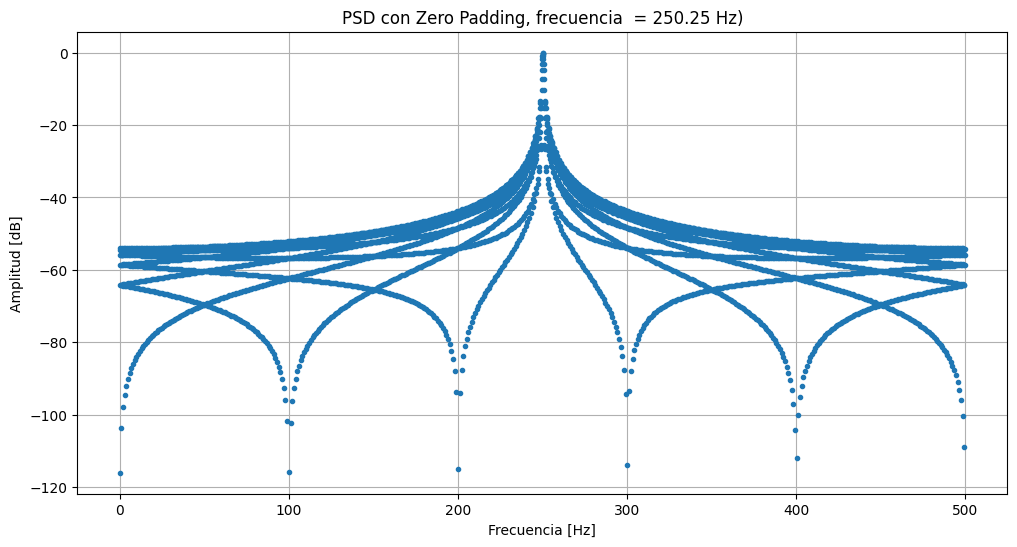

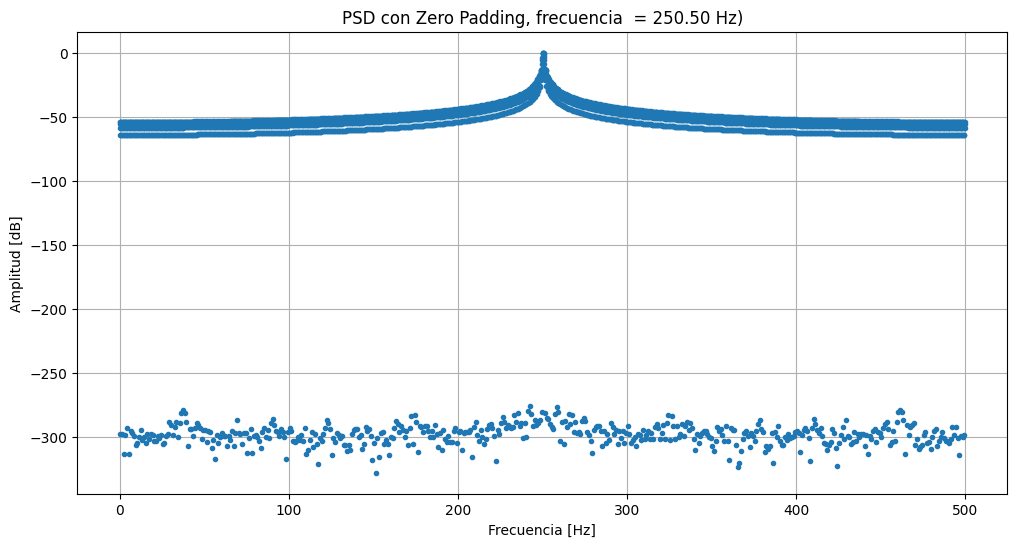

la resolucion de la frecuencia es: 0.1Hz


In [12]:
# ====== (c) Experimento con zero padding ======
N_pad = 10 * N
t_pad = np.arange(N_pad) / fs

for i, k0 in enumerate(k0_values):
    f0 = k0 * df
    x = amp * np.sin(2 * np.pi * f0 * t)
       
    # Agregar ceros
    x_pad = np.concatenate([x, np.zeros(9*N)])
    
    # FFT con padding
    X_pad = np.fft.fft(x_pad, N_pad)
    psd_pad = (np.abs(X_pad)**2) / N_pad
    psd_pad_dB = 10 * np.log10(psd_pad / np.max(psd_pad))  
    
    freqs_pad = np.fft.fftfreq(N_pad, 1/fs)
    
    plt.figure(figsize=(12, 6))
    plt.plot(freqs_pad[:N_pad//2], psd_pad_dB[:N_pad//2],'.')
    plt.title(f"PSD con Zero Padding, frecuencia  = {f0:.2f} Hz)")
    plt.xlabel("Frecuencia [Hz]")
    plt.ylabel("Amplitud [dB]")
    plt.grid()
    plt.show()

print(f"la resolucion de la frecuencia es: {fs/N_pad}Hz")

Agregando zero padding, la resolución en frecuencia mejora, aunque no se agregue información nueva de la señal. Esto permite visualizar con mayor detalle la contribución del espectro de la ventana rectangular, cuya transformada tiene forma de $\mathrm{sinc}$. De esta manera, el zero padding no reduce el desparramo espectral ni cambia la capacidad de distinguir frecuencias cercanas (resolución real), pero sí facilita observar cómo la energía de la senoidal se distribuye entre los diferentes lóbulos de la ventana.

Con $\Delta f = 0.1 Hz $, vemos que, ahora sí la frecuencia es un multiplo en el tercer caso, por lo que tiene sentido que su espectro se parezca al primer caso. Aun con el zero padding, vemos un desparramo más pronunciado en el segundo caso donde la frecuencia sigue sin ser multiplo de $\Delta f $.

## Conlcusiones

Las simulaciones realizadas muestran que el desparramo espectral aparece cuando la frecuencia de la señal no coincide con un múltiplo de la resolución espectral, lo que provoca que la energía se distribuya en varios bins vecinos. De este modo, pequeñas variaciones en la frecuencia generan espectros muy diferentes si no están alineadas con la grilla de la DFT. Se observó que la resolución espectral depende del número de muestras, y que el uso de zero padding permite interpolar dicha grilla y visualizar con mayor detalle la forma de la envolvente espectral asociada a la ventana, lo cual facilita la interpretación y la estimación de frecuencias cercanas. Finalmente, se concluye que el zero padding no reduce el leakage —para ello es necesario aplicar ventanas distintas de la rectangular—, sino que constituye una herramienta complementaria que mejora la presentación y el análisis del espectro sin aportar información adicional.

Con respecto al teorema de Parseval, se verificó que la energía total de la señal en el dominio temporal es igual a la energía total en el dominio frecuencial. <br>
Esto implica que la transformada de Fourier no altera la energía de la señal, sino que simplemente la redistribuye entre sus componentes espectrales.
En los casos con desalineamiento de frecuencia, la energía no se pierde: se reparte entre varios bins vecinos, pero el valor total se conserva. <br>
De este modo, aunque el espectro cambie su forma, la potencia total medida en ambos dominios se mantiene constante, confirmando numéricamente la validez del teorema de Parseval.

## Autoevaluación de Aprendizaje

Con la experienca practica del zero padding y desparramo espectral, me quedaron más claro los conceptos. Creo que resolví la tarea con seguridad.

Usé ChatGPT para ayudarme con la escitura de los codigos y con la conformación del informe.